['tank_liquidlevel', 'flowlevel', 'bottle_liquidlevel', 'motor_status']
######### NORMAL DATASET ###########
normal    1137
Name: class, dtype: int64
######### TEST DATASET #############
normal     1920
anomaly     785
Name: class, dtype: int64
Q1 25 percentile of the given data is,  -3.0333416338430705
Q1 50 percentile of the given data is,  -0.35427222262696745
Q1 75 percentile of the given data is,  0.9451708436909196
Interquartile range is 3.9785124775339904
low_limit is -9.001110350144057
up_limit is 6.912939559991906
[['Anomaly' '671']
 ['Normal' '2034']]
[1 1 1 ... 1 1 1]

Prediction accuracy for the test dataset
89.13%

Confusion Matrix
[[ 581  204]
 [  90 1830]]


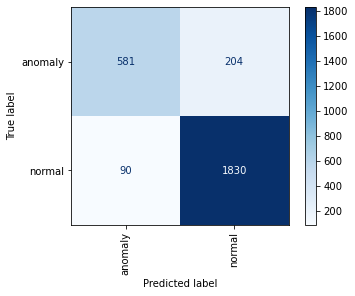

In [49]:
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statistics

X1 = pd.read_csv("C:/Users/seba/OneDrive/Studies/Thesis_RISE_2021/Thesis_ML_impl/data.csv")
#X2 = pd.read_csv("C:/Users/seba/OneDrive/Studies/Thesis_RISE_2021/Thesis_ML_impl/allanomaly.csv")
test = pd.read_csv("C:/Users/seba/OneDrive/Studies/Thesis_RISE_2021/Thesis_ML_impl/labelled1edited.csv")

features = X1.columns.tolist()
features.remove('timestamp'), features.remove('class')
print(features)

# Distribution of normal and anomaly traffic in train data
print('######### NORMAL DATASET ###########')
print(X1['class'].value_counts())
#print('######### ATTACK DATASET ###########')
#print(X2['class'].value_counts())
print('######### TEST DATASET #############')
print(test['class'].value_counts())

train_x1 = X1[features]; train_x2 = X2[features]
train_y1 = X1['class'];train_y2 = X2['class']

#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_y1 = LabelEncoder()
train_y1 = labelencoder_y1.fit_transform(train_y1)
labelencoder_y2 = LabelEncoder()
train_y2 = labelencoder_y2.fit_transform(train_y2)

test_x = test[features]
test_y = test['class']
labelencoder_y = LabelEncoder()
test_y = labelencoder_y.fit_transform(test_y)


from sklearn import metrics
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

hmm_clf1 = GaussianHMM(n_components=4, covariance_type='diag', n_iter=100).fit(train_x1, lengths=[47,45,43,48,54])
#hmm_clf2 = GaussianHMM(n_components=4, covariance_type='diag', n_iter=100).fit(train_x2)

scores1 = []
for i in range(len(train_x1)):
    scores1.append(hmm_clf1.score(train_x1.iloc[[i]]))
    
scores1 = np.sort(scores1)

Q1 = np.percentile(scores1, 25, interpolation = 'midpoint') 
Q2 = np.percentile(scores1, 50, interpolation = 'midpoint') 
Q3 = np.percentile(scores1, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)


low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

res = []
pred_test_hmm = []
for i in range(len(test_x)):
    a = hmm_clf1.score(test_x.iloc[[i]])
    if (a > up_lim or a < low_lim):
        res.append('Anomaly')
        pred_test_hmm.append('anomaly')
    else:
        res.append('Normal')
        pred_test_hmm.append('normal')
'''
res = []
pred_test_hmm = []
for i in range(len(test_x)):
    a = hmm_clf1.score(test_x.iloc[[i]])
    b = hmm_clf2.score(test_x.iloc[[i]])
    if(a>b):
        res.append('Normal')
        pred_test_hmm.append('normal')
    else:
        res.append('Anomaly')
        pred_test_hmm.append('anomaly')
'''            
(unique, counts) = np.unique(res, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

labelencoder_p = LabelEncoder()
pred_test_hmm = labelencoder_p.fit_transform(pred_test_hmm)
print(pred_test_hmm)
print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(test_y, pred_test_hmm)))

print('Confusion Matrix')
print(metrics.confusion_matrix(test_y, pred_test_hmm))
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(test_y, pred_test_hmm), display_labels=['anomaly','normal']).plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.show()
